In [ ]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [ ]:
X = pd.read_csv('filtered_df.csv')
X.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54
1,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3
2,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3
3,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24
4,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166


In [ ]:
X.condition.value_counts()


Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [ ]:
X1 = X.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)
X1.head()

,condition,review
0,Depression,"""I have taken anti-depressants for years, with..."
1,Depression,"""1 week on Zoloft for anxiety and mood swings...."
2,Depression,"""my gp started me on Venlafaxine yesterday to ..."
3,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
4,Depression,"""This medicine saved my life. I was at my wits..."


In [ ]:
X1.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [ ]:
#data preprocessing

In [ ]:
for i, col in enumerate(X1.columns):
    X1.iloc[:, i] = X1.iloc[:, i].str.replace('"', '')

In [ ]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

<ipython-input-8-a7edaab304c3>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [ ]:
#What are stopwords ?
#Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

#The most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Lemmitization
#Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words,
# normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .



In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()


In [ ]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [ ]:
from bs4 import BeautifulSoup
import re


In [ ]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
X1['review_clean'] = X1['review'].apply(review_to_words)
X1.head()


<ipython-input-18-96d5791fc591>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


,condition,review,review_clean
0,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\n\nI only take Cymbalta now mostly for pain.\n\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
1,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
2,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better",gp started venlafaxine yesterday help depression change hour taking feeling sick stomach food fluid thought keep told come side effect would get better took another one last night ill stand sick sweating shaking thought going pas get sleep hopeing feel better morning took another one felt spaced dry mouth shaking sick booked see gp make sure feeling like find put wrong dose mg put mg right dose hope better
3,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.",hey guy month since last post wanted give month see going work trulicity six month metformin hit five month period diarrhea gas sulphur belching finally subsided longer side effect however still lost weight think first started trulicity taking glimepiride one side effect weight gain think two med fighting lol back metformin trulicity week see diagnosed stage chronic kidney disease ckd watching diet closely
4,Depression,"This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recommend this for s

#Creating features and Target Variable

In [ ]:
X_feat=X1['review_clean']
y=X1['condition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Bag of Words
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [ ]:
#Bigrams
count_vectorizer1 = CountVectorizer(stop_words='english', ngram_range = (1, 2))

count_train1 = count_vectorizer1.fit_transform(X_train)

count_test1 = count_vectorizer1.transform(X_test)

In [ ]:
#Trigrams
count_vectorizer2 = CountVectorizer(stop_words='english', ngram_range = (1, 3))

count_train2 = count_vectorizer2.fit_transform(X_train)

count_test2 = count_vectorizer2.transform(X_test)

In [ ]:
#Quad_grams
count_vectorizer3 = CountVectorizer(stop_words='english', ngram_range = (1, 4))

count_train3 = count_vectorizer3.fit_transform(X_train)

count_test3 = count_vectorizer3.transform(X_test)

In [ ]:
#5_grams
count_vectorizer4 = CountVectorizer(stop_words='english', ngram_range = (1, 5))

count_train4 = count_vectorizer4.fit_transform(X_train)

count_test4 = count_vectorizer4.transform(X_test)

##Machine Learning Model : PassiveAggressiveClassifier

Using Bag of words

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

In [ ]:
pac.fit(count_train, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred1 = pac.predict(count_test)
score1 = metrics.accuracy_score(y_test, pred1)
print("accuracy:   %0.5f" % score1)

accuracy:   0.95016


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

                     precision    recall  f1-score   support

         Depression       0.96      0.97      0.97      1814
   Diabetes, Type 2       0.94      0.93      0.94       511
High Blood Pressure       0.92      0.87      0.90       464

           accuracy                           0.95      2789
          macro avg       0.94      0.93      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



Confusion matrix


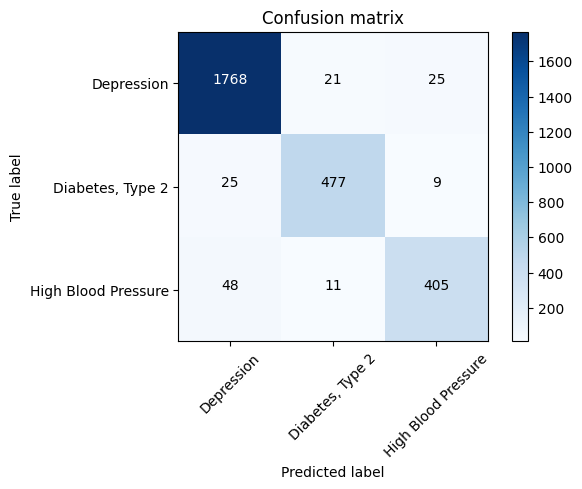

In [ ]:
cm = metrics.confusion_matrix(y_test, pred1, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

Using Bigrams

In [ ]:
pac1 = PassiveAggressiveClassifier()   
pac1.fit(count_train1, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred2 = pac1.predict(count_test1)
score2 = metrics.accuracy_score(y_test, pred2)
print("accuracy:   %0.5f" % score2)

accuracy:   0.94980


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

                     precision    recall  f1-score   support

         Depression       0.96      0.97      0.97      1814
   Diabetes, Type 2       0.91      0.93      0.92       511
High Blood Pressure       0.95      0.87      0.91       464

           accuracy                           0.95      2789
          macro avg       0.94      0.93      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



Confusion matrix


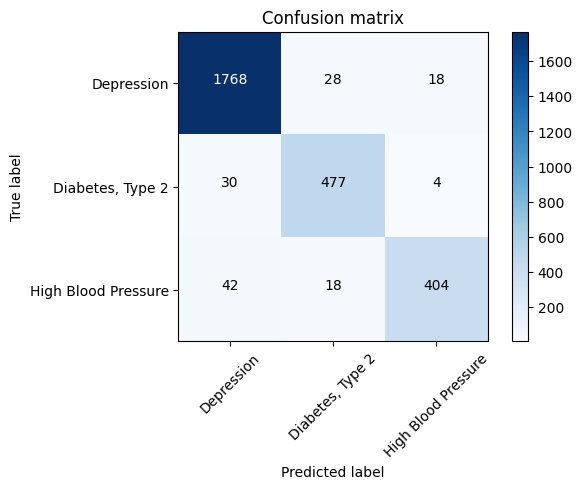

In [ ]:
cm = metrics.confusion_matrix(y_test, pred2, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

Using trigrams

In [ ]:
pac2 = PassiveAggressiveClassifier()  
pac2.fit(count_train2, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred3 = pac2.predict(count_test2)
score3 = metrics.accuracy_score(y_test, pred3)
print("accuracy:   %0.5f" % score3)

accuracy:   0.94980


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred3))

                     precision    recall  f1-score   support

         Depression       0.95      0.98      0.97      1814
   Diabetes, Type 2       0.96      0.92      0.94       511
High Blood Pressure       0.93      0.86      0.89       464

           accuracy                           0.95      2789
          macro avg       0.95      0.92      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



Confusion matrix


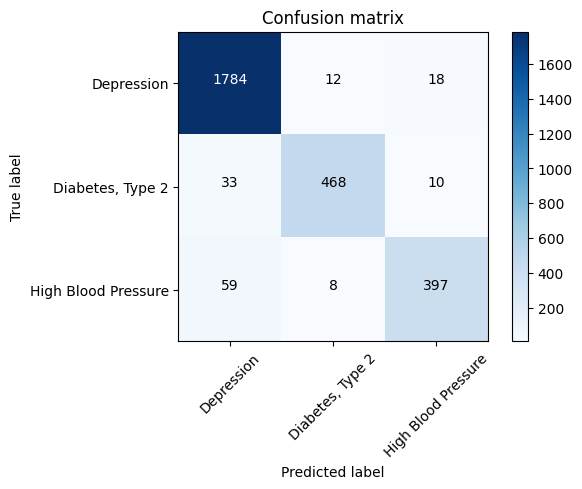

In [ ]:
cm = metrics.confusion_matrix(y_test, pred3, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

Using Quad_grams

In [ ]:
pac3 = PassiveAggressiveClassifier()      
pac3.fit(count_train3, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred4 = pac3.predict(count_test3)
score4 = metrics.accuracy_score(y_test, pred4)
print("accuracy:   %0.5f" % score4)

accuracy:   0.94944


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred4))

                     precision    recall  f1-score   support

         Depression       0.96      0.98      0.97      1814
   Diabetes, Type 2       0.96      0.90      0.93       511
High Blood Pressure       0.90      0.89      0.90       464

           accuracy                           0.95      2789
          macro avg       0.94      0.92      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



Confusion matrix


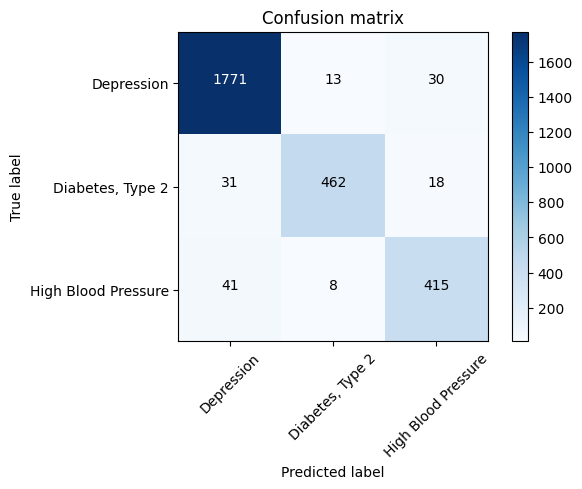

In [ ]:
cm = metrics.confusion_matrix(y_test, pred4, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

Using 5_gram

In [ ]:
pac4 = PassiveAggressiveClassifier()
pac4.fit(count_train4, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred5 = pac4.predict(count_test4)
score5 = metrics.accuracy_score(y_test, pred5)
print("accuracy:   %0.5f" % score5)

accuracy:   0.94658


In [ ]:
from sklearn.metrics import classification_report  
print(classification_report(y_test,pred5))

                     precision    recall  f1-score   support

         Depression       0.96      0.97      0.97      1814
   Diabetes, Type 2       0.95      0.90      0.92       511
High Blood Pressure       0.90      0.89      0.89       464

           accuracy                           0.95      2789
          macro avg       0.93      0.92      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



Confusion matrix


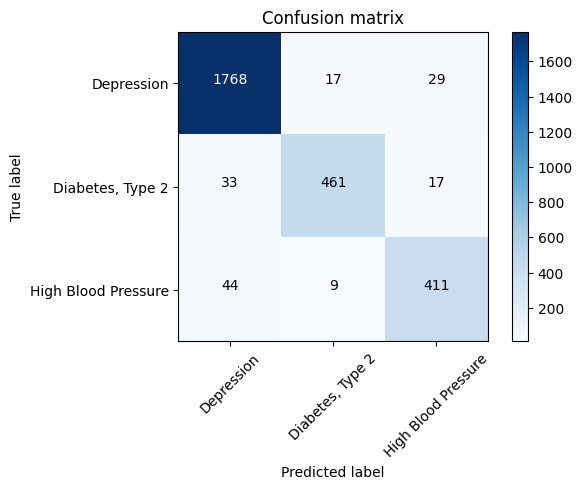

In [ ]:
cm = metrics.confusion_matrix(y_test, pred5, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

Using TfidfVectorizer  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
pac_tf = PassiveAggressiveClassifier() 
pac_tf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred6 = pac_tf.predict(tfidf_test)
score6 = metrics.accuracy_score(y_test, pred6)
print("accuracy:   %0.5f" % score6)

accuracy:   0.96163


Confusion matrix


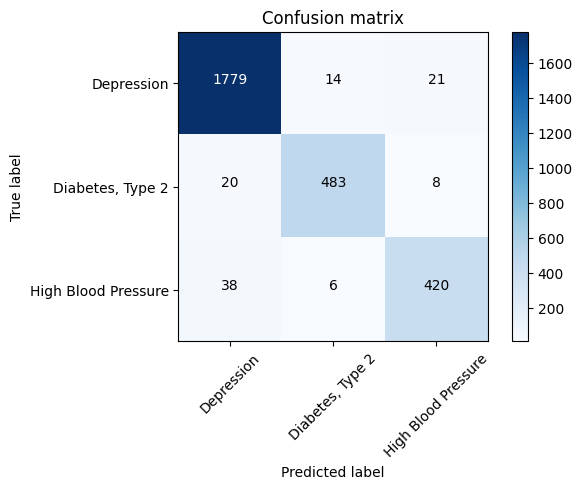

In [ ]:
cm = metrics.confusion_matrix(y_test, pred6, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred6))

                     precision    recall  f1-score   support

         Depression       0.97      0.98      0.97      1814
   Diabetes, Type 2       0.96      0.95      0.95       511
High Blood Pressure       0.94      0.91      0.92       464

           accuracy                           0.96      2789
          macro avg       0.95      0.94      0.95      2789
       weighted avg       0.96      0.96      0.96      2789



Using TFIDF Bigram

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range = (1, 2))
tfidf_trail1 = tfidf_vectorizer1.fit_transform(X_train)
tfidf_test1 = tfidf_vectorizer1.transform(X_test)

In [ ]:
pac_tf1 = PassiveAggressiveClassifier()  
pac_tf1.fit(tfidf_trail1, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred7 = pac_tf1.predict(tfidf_test1)
score7 = metrics.accuracy_score(y_test, pred7)
print("accuracy:   %0.5f" % score7)

accuracy:   0.96665


Confusion matrix


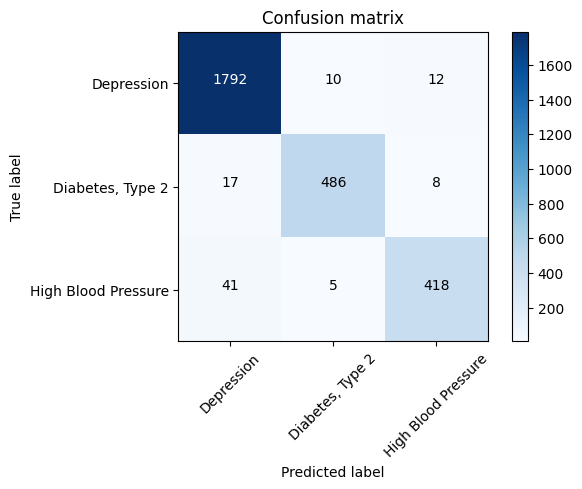

In [ ]:
cm = metrics.confusion_matrix(y_test, pred7, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred7))

                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      1814
   Diabetes, Type 2       0.97      0.95      0.96       511
High Blood Pressure       0.95      0.90      0.93       464

           accuracy                           0.97      2789
          macro avg       0.96      0.95      0.96      2789
       weighted avg       0.97      0.97      0.97      2789



Using TFIDF Trigram

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range = (1, 3))
tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test2 = tfidf_vectorizer2.transform(X_test)

In [ ]:
pac_tf2 = PassiveAggressiveClassifier() 
pac_tf2.fit(tfidf_train2, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred8 = pac_tf2.predict(tfidf_test2)
score8 = metrics.accuracy_score(y_test, pred8)
print("accuracy:   %0.5f" % score8)

accuracy:   0.96701


Confusion matrix


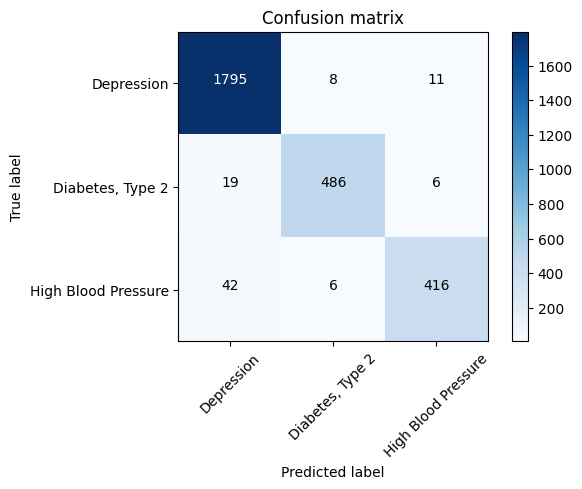

In [ ]:
cm = metrics.confusion_matrix(y_test, pred8, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred8))   

                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      1814
   Diabetes, Type 2       0.97      0.95      0.96       511
High Blood Pressure       0.96      0.90      0.93       464

           accuracy                           0.97      2789
          macro avg       0.97      0.95      0.96      2789
       weighted avg       0.97      0.97      0.97      2789



Using TFIDF Quad_gram

In [ ]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range = (1, 4))
tfidf_train3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test3 = tfidf_vectorizer3.transform(X_test)

In [ ]:
pac_tf3 = PassiveAggressiveClassifier()
pac_tf3.fit(tfidf_train3, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred9 = pac_tf3.predict(tfidf_test3)
score9 = metrics.accuracy_score(y_test, pred9)
print("accuracy:   %0.5f" % score9)

accuracy:   0.96630


Confusion matrix


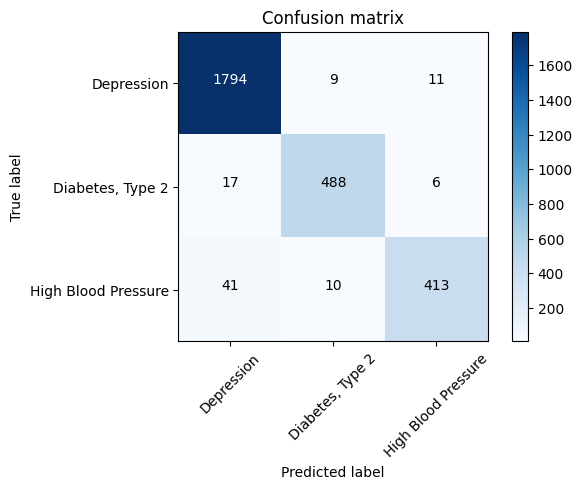

In [ ]:
cm = metrics.confusion_matrix(y_test, pred9, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred9))

                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      1814
   Diabetes, Type 2       0.96      0.95      0.96       511
High Blood Pressure       0.96      0.89      0.92       464

           accuracy                           0.97      2789
          macro avg       0.96      0.94      0.95      2789
       weighted avg       0.97      0.97      0.97      2789



Using TFIDF 5_gram

In [ ]:
tfidf_vectorizer4 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range = (1, 5))
tfidf_train4 = tfidf_vectorizer4.fit_transform(X_train)
tfidf_test4 = tfidf_vectorizer4.transform(X_test)

In [ ]:
pac_tf4 = PassiveAggressiveClassifier()
pac_tf4.fit(tfidf_train4, y_train)

PassiveAggressiveClassifier()

In [ ]:
pred10 = pac_tf4.predict(tfidf_test4)
score10 = metrics.accuracy_score(y_test, pred10)
print("accuracy:   %0.5f" % score10)

accuracy:   0.96594


Confusion matrix


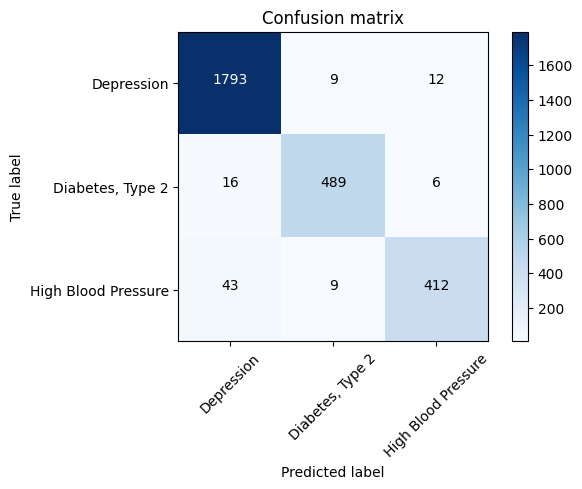

In [ ]:
cm = metrics.confusion_matrix(y_test, pred10, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred10))

                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      1814
   Diabetes, Type 2       0.96      0.96      0.96       511
High Blood Pressure       0.96      0.89      0.92       464

           accuracy                           0.97      2789
          macro avg       0.96      0.94      0.95      2789
       weighted avg       0.97      0.97      0.97      2789



In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range = (1, 3))
tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test2 = tfidf_vectorizer2.transform(X_test)

pac_tf2 = PassiveAggressiveClassifier() 
pac_tf2.fit(tfidf_train2, y_train)

pred8 = pac_tf2.predict(tfidf_test2)
score8 = metrics.accuracy_score(y_test, pred8)
print("accuracy:   %0.5f" % score8)

In [ ]:
#Most important Features
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)
most_informative_feature_for_class(tfidf_vectorizer2, pac_tf2, 'Depression')
most_informative_feature_for_class(tfidf_vectorizer2, pac_tf2, 'High Blood Pressure')
most_informative_feature_for_class(tfidf_vectorizer2, pac_tf2, 'Diabetes, Type 2')

Depression effexor 3.7643463516460915
Depression antidepressant 3.765520975940333
Depression lexapro 3.8412838249425807
Depression cymbalta 3.91783661697537
Depression wellbutrin 4.130192872457116
Depression zoloft 4.1445197143138355
Depression pristiq 4.331461808402941
Depression mood 4.573489687624799
Depression anxiety 4.854279772094651
Depression depression 9.395902473285005
High Blood Pressure bystolic 3.00878753890984
High Blood Pressure hypertension 3.0989750150724436
High Blood Pressure losartan 3.3173257907030016
High Blood Pressure amlodipine 3.372647209059016
High Blood Pressure benicar 3.7661957572891223
High Blood Pressure lisinopril 4.8753349385192015
High Blood Pressure blood pressure 5.915281925497095
High Blood Pressure cough 5.957564158695266
High Blood Pressure pressure 7.614591554442005
High Blood Pressure bp 8.868724523640463
Diabetes, Type 2 januvia 3.8325959218962775
Diabetes, Type 2 number 3.8551597114432745
Diabetes, Type 2 invokana 4.105008726545317
Diabetes, 

In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pac_tf2, 'Depression')

Depression effexor 3.7643463516460915
Depression antidepressant 3.765520975940333
Depression lexapro 3.8412838249425807
Depression cymbalta 3.91783661697537
Depression wellbutrin 4.130192872457116
Depression zoloft 4.1445197143138355
Depression pristiq 4.331461808402941
Depression mood 4.573489687624799
Depression anxiety 4.854279772094651
Depression depression 9.395902473285005


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pac_tf2, 'High Blood Pressure')

High Blood Pressure bystolic 3.00878753890984
High Blood Pressure hypertension 3.0989750150724436
High Blood Pressure losartan 3.3173257907030016
High Blood Pressure amlodipine 3.372647209059016
High Blood Pressure benicar 3.7661957572891223
High Blood Pressure lisinopril 4.8753349385192015
High Blood Pressure blood pressure 5.915281925497095
High Blood Pressure cough 5.957564158695266
High Blood Pressure pressure 7.614591554442005
High Blood Pressure bp 8.868724523640463


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pac_tf2, 'Diabetes, Type 2')

Diabetes, Type 2 januvia 3.8325959218962775
Diabetes, Type 2 number 3.8551597114432745
Diabetes, Type 2 invokana 4.105008726545317
Diabetes, Type 2 blood sugar 4.45147532608253
Diabetes, Type 2 insulin 4.59027951453324
Diabetes, Type 2 trulicity 5.0328372383114495
Diabetes, Type 2 injection 5.693311890379945
Diabetes, Type 2 victoza 6.67900355559032
Diabetes, Type 2 metformin 6.94136895281961
Diabetes, Type 2 sugar 8.750024249042497


In [ ]:
#Sample Predictions
X.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
13939,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why.""",4,"July 15, 2009",39
13940,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112.""",1,"July 18, 2009",25
13941,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me""",9,"October 23, 2015",47
13942,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.""",2,"July 17, 2016",33
13943,103458,Tekturna,High Blood Pressure,"""I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.""",7,"February 7, 2010",18


In [ ]:
test = tfidf_vectorizer2.transform(["It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why.	"]).toarray()
pred1=pac_tf2.predict(test)  
pred1

array(['High Blood Pressure'], dtype='<U19')

In [ ]:
test = tfidf_vectorizer2.transform(["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me	"]).toarray()
pred2=pac_tf2.predict(test)[0]
pred2


'Diabetes, Type 2'

In [ ]:
test1 = tfidf_vectorizer2.transform([" Persistent feelings of sadness, emptiness, hopelessness, and worthlessness	"]).toarray()
pred2=pac_tf2.predict(test1)
pred2

array(['Depression'], dtype='<U19')

In [ ]:
test1 = tfidf_vectorizer2.transform([" Sleep disturbances, including insomnia or oversleeping	"]).toarray()
pred2=pac_tf2.predict(test1)
pred2

array(['Depression'], dtype='<U19')